# Project: Investigating  No-Show Appointments in Brazil in 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains details on medical appointments, characteristics of patients and whether they showed up for their appointments. It contains 110,527 rows of appointments and 14 columns explained below:   

### Data Dictionary

***Column Name | Data Type | Brief Description of the data***
1. *PatientID (int)* - Unique identifier for each patient
2. *AppointmentID (int)* - Unique identifier for each appointment
3. *Gender (str)* - Gender of the patient
4. *ScheduledDay (date)*- The date a patient booked the appointment
5. *ScheduledDayTime (dtime)*- The time a patient booked the appointment
6. *AppointmentDay (date)* - The date a patient is supposed to see a doctor
7. *Age (int)*- The age of the patient
8. *Neighborhood (str)* - Location/area near the hospital
9. *Scholarship (boolean)* - indicates whether patient is enrolled in govt welfare social program
10. *Hypertension (boolean)* - indicates whther patient has high blood pressure
11. *Diabetes (boolean)* -indicates whether patient is diabetic or not
12. *Alcoholism (boolean)* - Indicates whether patient is alcoholic or not
13. *SMS_received (boolean)* - indicates whether patient was notified of upcoming appointment
14. *No_show (str)* - indicates whether patient showed up to appointment 

    >NB: The dataset uses 0 and 1 to represent False and True respectively
    
### Questions to investigate
The goal of this project is to determine how the various characteristics of a patient may help determine whether they will show up to their medical appointment by examining the following questions:
1. what is the gender distribution of the patients?
2. What is the gender distribution of patients who showed up to their appointments?
3. Do patients with pre-existing medical conditions (hypertension) adhere to their appointments?
4. What are the characteristics of the patients in the neigborhood with the highest no-show appointments?
5. What are the characteristics of the patients in the neigborhood with the lowest no-show appointments?
6. Are patients who received a reminder SMS likely to show than those who didnt?
7. do alcoholics who receive a reminder SMS likely to show up than those who dont receive the SMS?



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%autosave 30

Autosaving every 30 seconds


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [12]:
#Load dataset from the CSV file.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [14]:
#Get a general outlook of the data
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [28]:
#dataFrame dimensions
'Rows: {}'.format(df.shape[0]), 'Columns: {}'.format(df.shape[1]) 

('Rows: 110527', 'Columns: 14')

In [15]:
#DataFrame DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### Check for any Duplicates

In [22]:
'Number of dupicated rows in the dataset is: {}'.format(sum(df.duplicated()))

'Number of dupicated rows in the dataset is: 0'

###### Check and Drop any rows with NULL/NaN entries

In [23]:
# Check for null values in every column 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

###### There are NO NULL entries in the dataset

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

##### Print the dataset for visual inspection

In [24]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


###### Inspect column data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

### Issues with the Data

#### Issues with Data
##### 1. Column names
1. Hipertension: Column name is misspelled as hipertension instead of hypertension
2. No-show: column name has a hyphen separating the two words
3. PatientId: Rename to PatientID to mantain uniformity with other columns with the word ID in them.
##### 2. DataTypes
1. PatientID: Convert DataType from float(represented as a scientific num) to a String object
2. ScheduledDay: Clean and Convert DataType From String obj to datetime (Extract dates) and Extract TimeStamps into a  separate column (ScheduledDayTime).
3. AppointmentDay: Clean and Convert DataType From String obj to datetime (Extract dates)

## 1. Data Cleaning - Column Names



##### a) Rename the PatientId column

In [26]:
df.rename(columns = {'PatientId': 'PatientID'}, inplace=True)

In [27]:
#Confirm changes
df.columns[0]

'PatientID'

##### b) Rename the Hipertension column

In [28]:
df.rename(columns = {'Hipertension': 'Hypertension'}, inplace=True)

In [29]:
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### c) Rename the No-show column

In [30]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [32]:
#confirm the changes
df.columns[-1]

'No_show'

###### d) Confirm that column headers are clean

In [31]:
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## 2. Data Cleaning - Converting data to correct data types

#### a) Converting PatientID column from float to str

In [35]:
# Column Details
df['PatientID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: PatientID
Non-Null Count   Dtype  
--------------   -----  
110527 non-null  float64
dtypes: float64(1)
memory usage: 863.6 KB


In [37]:
# i. Convert the column into str
# ii. Split the resulting string into two parts using the decimal
# iii. Use slicing to pick the 1st part of split

df['PatientID'] = df['PatientID'].astype(str).str.split('.').str[0].astype(str)

##### Confirm PatientID data Type

In [41]:
df['PatientID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: PatientID
Non-Null Count   Dtype 
--------------   ----- 
110527 non-null  object
dtypes: object(1)
memory usage: 863.6+ KB


In [40]:
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No



#### b) Extract Time from ScheduledDay string to a new column ScheduledDayTime

In [42]:
# 1. Split the scheduledDay string using T
# 2. USe slicing to obtain the 2nd section of the resulting list
# 3. Use slicing to pick all the indexes but exclude the last indexed item 

df['ScheduledDayTime'] = pd.to_datetime(df['ScheduledDay'].str.split('T').str[1].str[:-1],format='%H:%M:%S').dt.time

In [45]:
#Confirm creation of new column
df['ScheduledDayTime']

0         18:38:08
1         16:08:27
2         16:19:04
3         17:29:31
4         16:07:23
            ...   
110522    09:15:35
110523    07:27:33
110524    16:03:52
110525    15:09:23
110526    13:30:56
Name: ScheduledDayTime, Length: 110527, dtype: object

#### c) Extract Date from ScheduledDay Column

In [46]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].str.split('T').str[0],format='%Y/%m/%d')

In [47]:
df['ScheduledDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

#### d) Extract Time from AppointmentDay string to a new column AppointmentDayTime

In [48]:
df['AppointmentDayTime'] = pd.to_datetime(df['AppointmentDay'].str.split('T').str[1].str[:-1],format='%H:%M:%S').dt.time

In [49]:
# confirm the number of unique values in AppointmentDayTime
df.AppointmentDayTime.value_counts()

00:00:00    110527
Name: AppointmentDayTime, dtype: int64

In [50]:
# 00:00:00 is the only unique timestamp DROP COLUMN FROM df
df.drop(columns='AppointmentDayTime', inplace=True)

#### e) Extract Date from AppointmentDate

In [51]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].str.split('T').str[0],format='%Y/%m/%d')

In [52]:
df['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

### Confirm that the data is clean and ready for analysis

In [53]:
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDayTime
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27


In [54]:
# Check for any duplicated rows
df.duplicated().sum()

0

In [56]:
# Everything looks in order. EXPORT Clean DataFrame to CSV
df.to_csv('clean_noshowappointments_2016.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [63]:
df_16 = pd.read_csv('clean_noshowappointments_2016.csv')

### Research Question 1. what is the gender distribution of the patients?

In [65]:
#No of unique patients in dateset
df_16['PatientID'].nunique()

62299

###### Distinct count of male and Female Patients

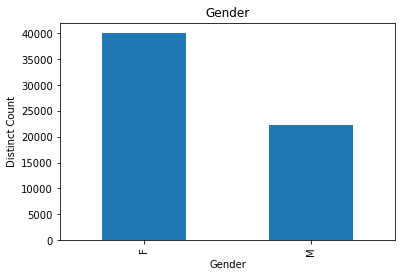

In [109]:
df_16.groupby('Gender')['PatientID'].nunique().plot(kind='bar', title='Gender',ylabel='Distinct Count' );

In [86]:
# Confirm whether barchart is correct 

#Female patients
df_16[df_16['Gender'] == 'F']['PatientID'].nunique() 

40046

In [87]:
#Male Patients
df_16[df_16['Gender'] == 'M']['PatientID'].nunique()

22253

In [85]:
df_16[df_16['Gender'] == 'M']['PatientID'].nunique() + df_16[df_16['Gender'] == 'F']['PatientID'].nunique() == df_16['PatientID'].nunique()

True

In [105]:
#Percentage of Patients
'Female: {}%'.format(int((df_16[df_16['Gender'] == 'F']['PatientID'].nunique() /df_16['PatientID'].nunique())*100)),'Male: {}%'.format(int((df_16[df_16['Gender'] == 'M']['PatientID'].nunique() /df_16['PatientID'].nunique())*100))

('Female: 64%', 'Male: 35%')

### Research Question 2. What is the gender distribution of patients who showed up to their appointments?

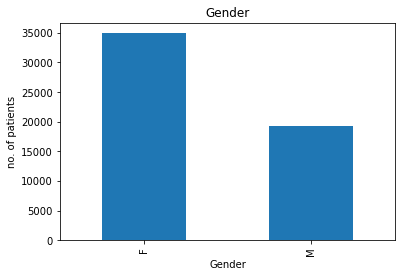

In [114]:
# Count of patients [PatientID] who showed up at least once to their appointment

df_16[df['No_show']=='No'].groupby('Gender')['PatientID'].nunique().plot(kind='bar', title='Gender',ylabel='no. of patients' );

In [115]:
df_16[df['No_show']=='No'].groupby('Gender')['PatientID'].nunique()

Gender
F    34961
M    19193
Name: PatientID, dtype: int64


### Research Question 3. Do patients with pre-existing medical conditions (hypertension)  adhere to their appointments compared to other patients?

In [134]:
df_16.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDayTime
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27


In [137]:
df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()

Hypertension  No_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: AppointmentID, dtype: int64

In [165]:
#number of patients with no hypertension who ATTENDED their appointments
no_hyper_attended_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[0]['No']

In [167]:
##number of patients with no hypertension who SKIPPED their appointments
no_hyper_skipped_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[0]['Yes']

In [178]:
#Patients without hypertension Appointment attendance rate
no_hyper_rate = round((no_hyper_attended_app / (no_hyper_attended_app + no_hyper_skipped_app)) *100)

In [179]:
"Patients without Hypertension have a {}% appointment attendance rate".format(no_hyper_rate)

'Patients without Hypertension have a 79% appointment attendance rate'

In [182]:
#number of patients WITH hypertension who ATTENDED their appointments
hyper_attended_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[1]['No']

In [183]:
##number of patients WITH hypertension who SKIPPED their appointments
hyper_skipped_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[1]['Yes']

In [184]:
hyper_rate = round(hyper_attended_app/(hyper_skipped_app+hyper_attended_app)*100)

In [185]:
"Patients WITH Hypertension have a {}% appointment attendance rate".format(hyper_rate)

'Patients WITH Hypertension have a 83% appointment attendance rate'

> *Patients with Hypertension have a higher appointment attendance rate of 83% when compared to patients without hypertension whose appointment attendance rate stands at 79%*

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!